Dataset:

https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones/download

### Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [2]:
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')
training_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
# Get X and y for training data
X_train = training_data.drop(columns=['Activity','subject'])
y_train = training_data["Activity"]

# Get X and y for testing data
X_test = testing_data.drop(columns=['Activity','subject'])
y_test = testing_data["Activity"]

### Data Visualization

Now let's visualize the data to understand some hidden features of the dataset:

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400'),
  Text(0, 1600.0, '1600')])

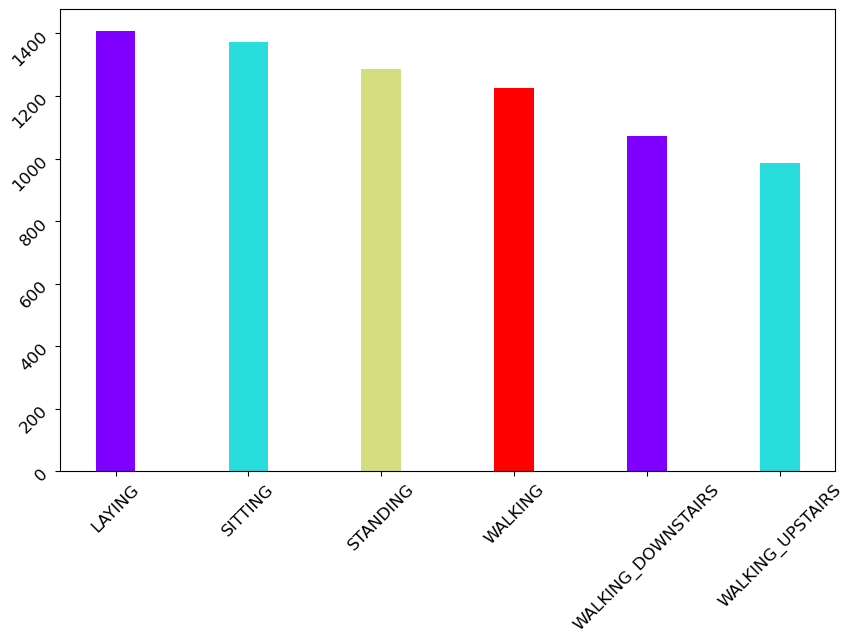

In [5]:
count_of_each_activity = np.array(y_train.value_counts())
activities = sorted(y_train.unique())
colors = cm.rainbow(np.linspace(0, 1, 4))
plt.figure(figsize=(10, 6))
plt.bar(activities, count_of_each_activity, width=0.3, color=colors)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)

([<matplotlib.patches.Wedge at 0x7fb52fddec90>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

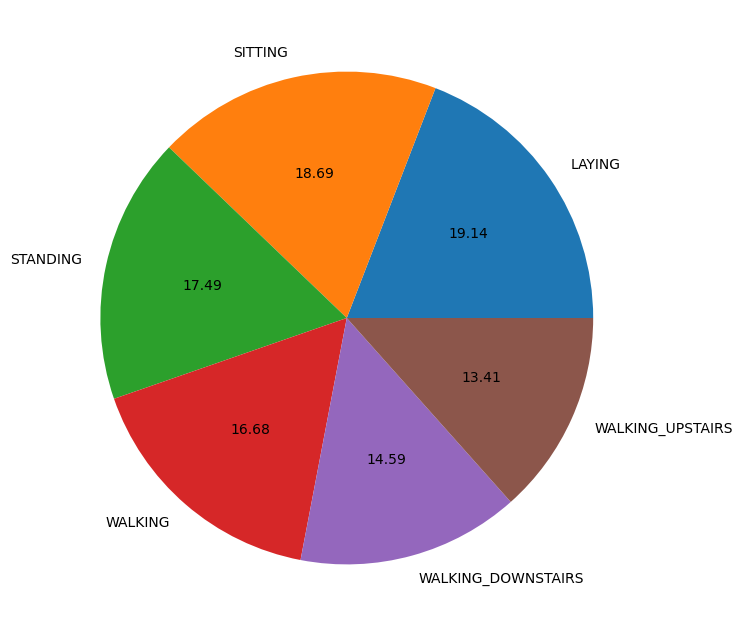

In [6]:
plt.figure(figsize=(16,8))
plt.pie(count_of_each_activity, labels=activities, autopct='%0.2f')

The percentage of values shows that the size of the data for each activity is comparable. The dataset is also distributed. By inspecting the dataset, I can see that there are a lot of features.

It is easy to identify that there is an accelerometer, gyroscope, and other values in the data set. I can check everyone’s share by plotting a bar graph of each type. Accelerometer values have Acc in them, Gyroscope values have Gyro, and rest can be considered like others:

<BarContainer object of 3 artists>

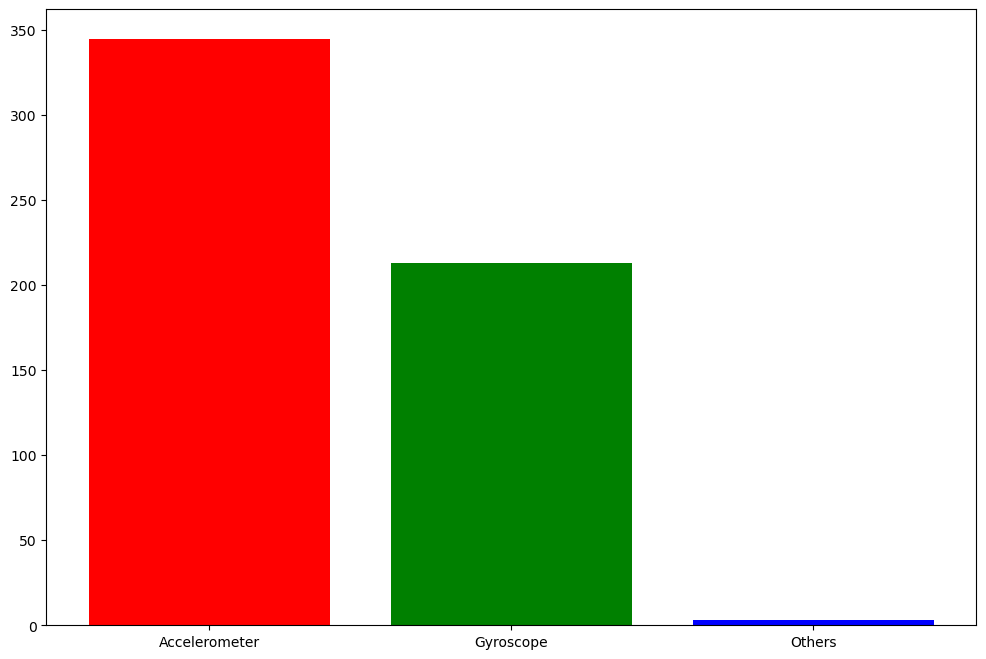

In [7]:
Acc = 0
Gyro = 0
other = 0

for value in X_train.columns:
    if "Acc" in str(value):
        Acc+=1
    elif "Gyro" in str(value):
        Gyro+=1
    else:
        other +=1

plt.figure(figsize=(12,8))
plt.bar(['Accelerometer','Gyroscope', 'Others'], [Acc, Gyro, other], color=('r','g','b'))

The accelerometer provides the maximum functionality, followed by the gyroscope. The other features are much less so.

In [8]:
training_data['subject'].unique()
standing_activity = training_data[training_data["Activity"] == 'STANDING']
# Reset the index for this dataframe
standing_activity = standing_activity.reset_index(drop=True)
time = 1
index = 0
time_series = np.zeros(standing_activity.shape[0])
print(time_series)

[0. 0. 0. ... 0. 0. 0.]


The data collected is in continuous time series for each individual and was recorded at the same rate. So I can just assign time values to each activity starting from 0 whenever the topic changes:

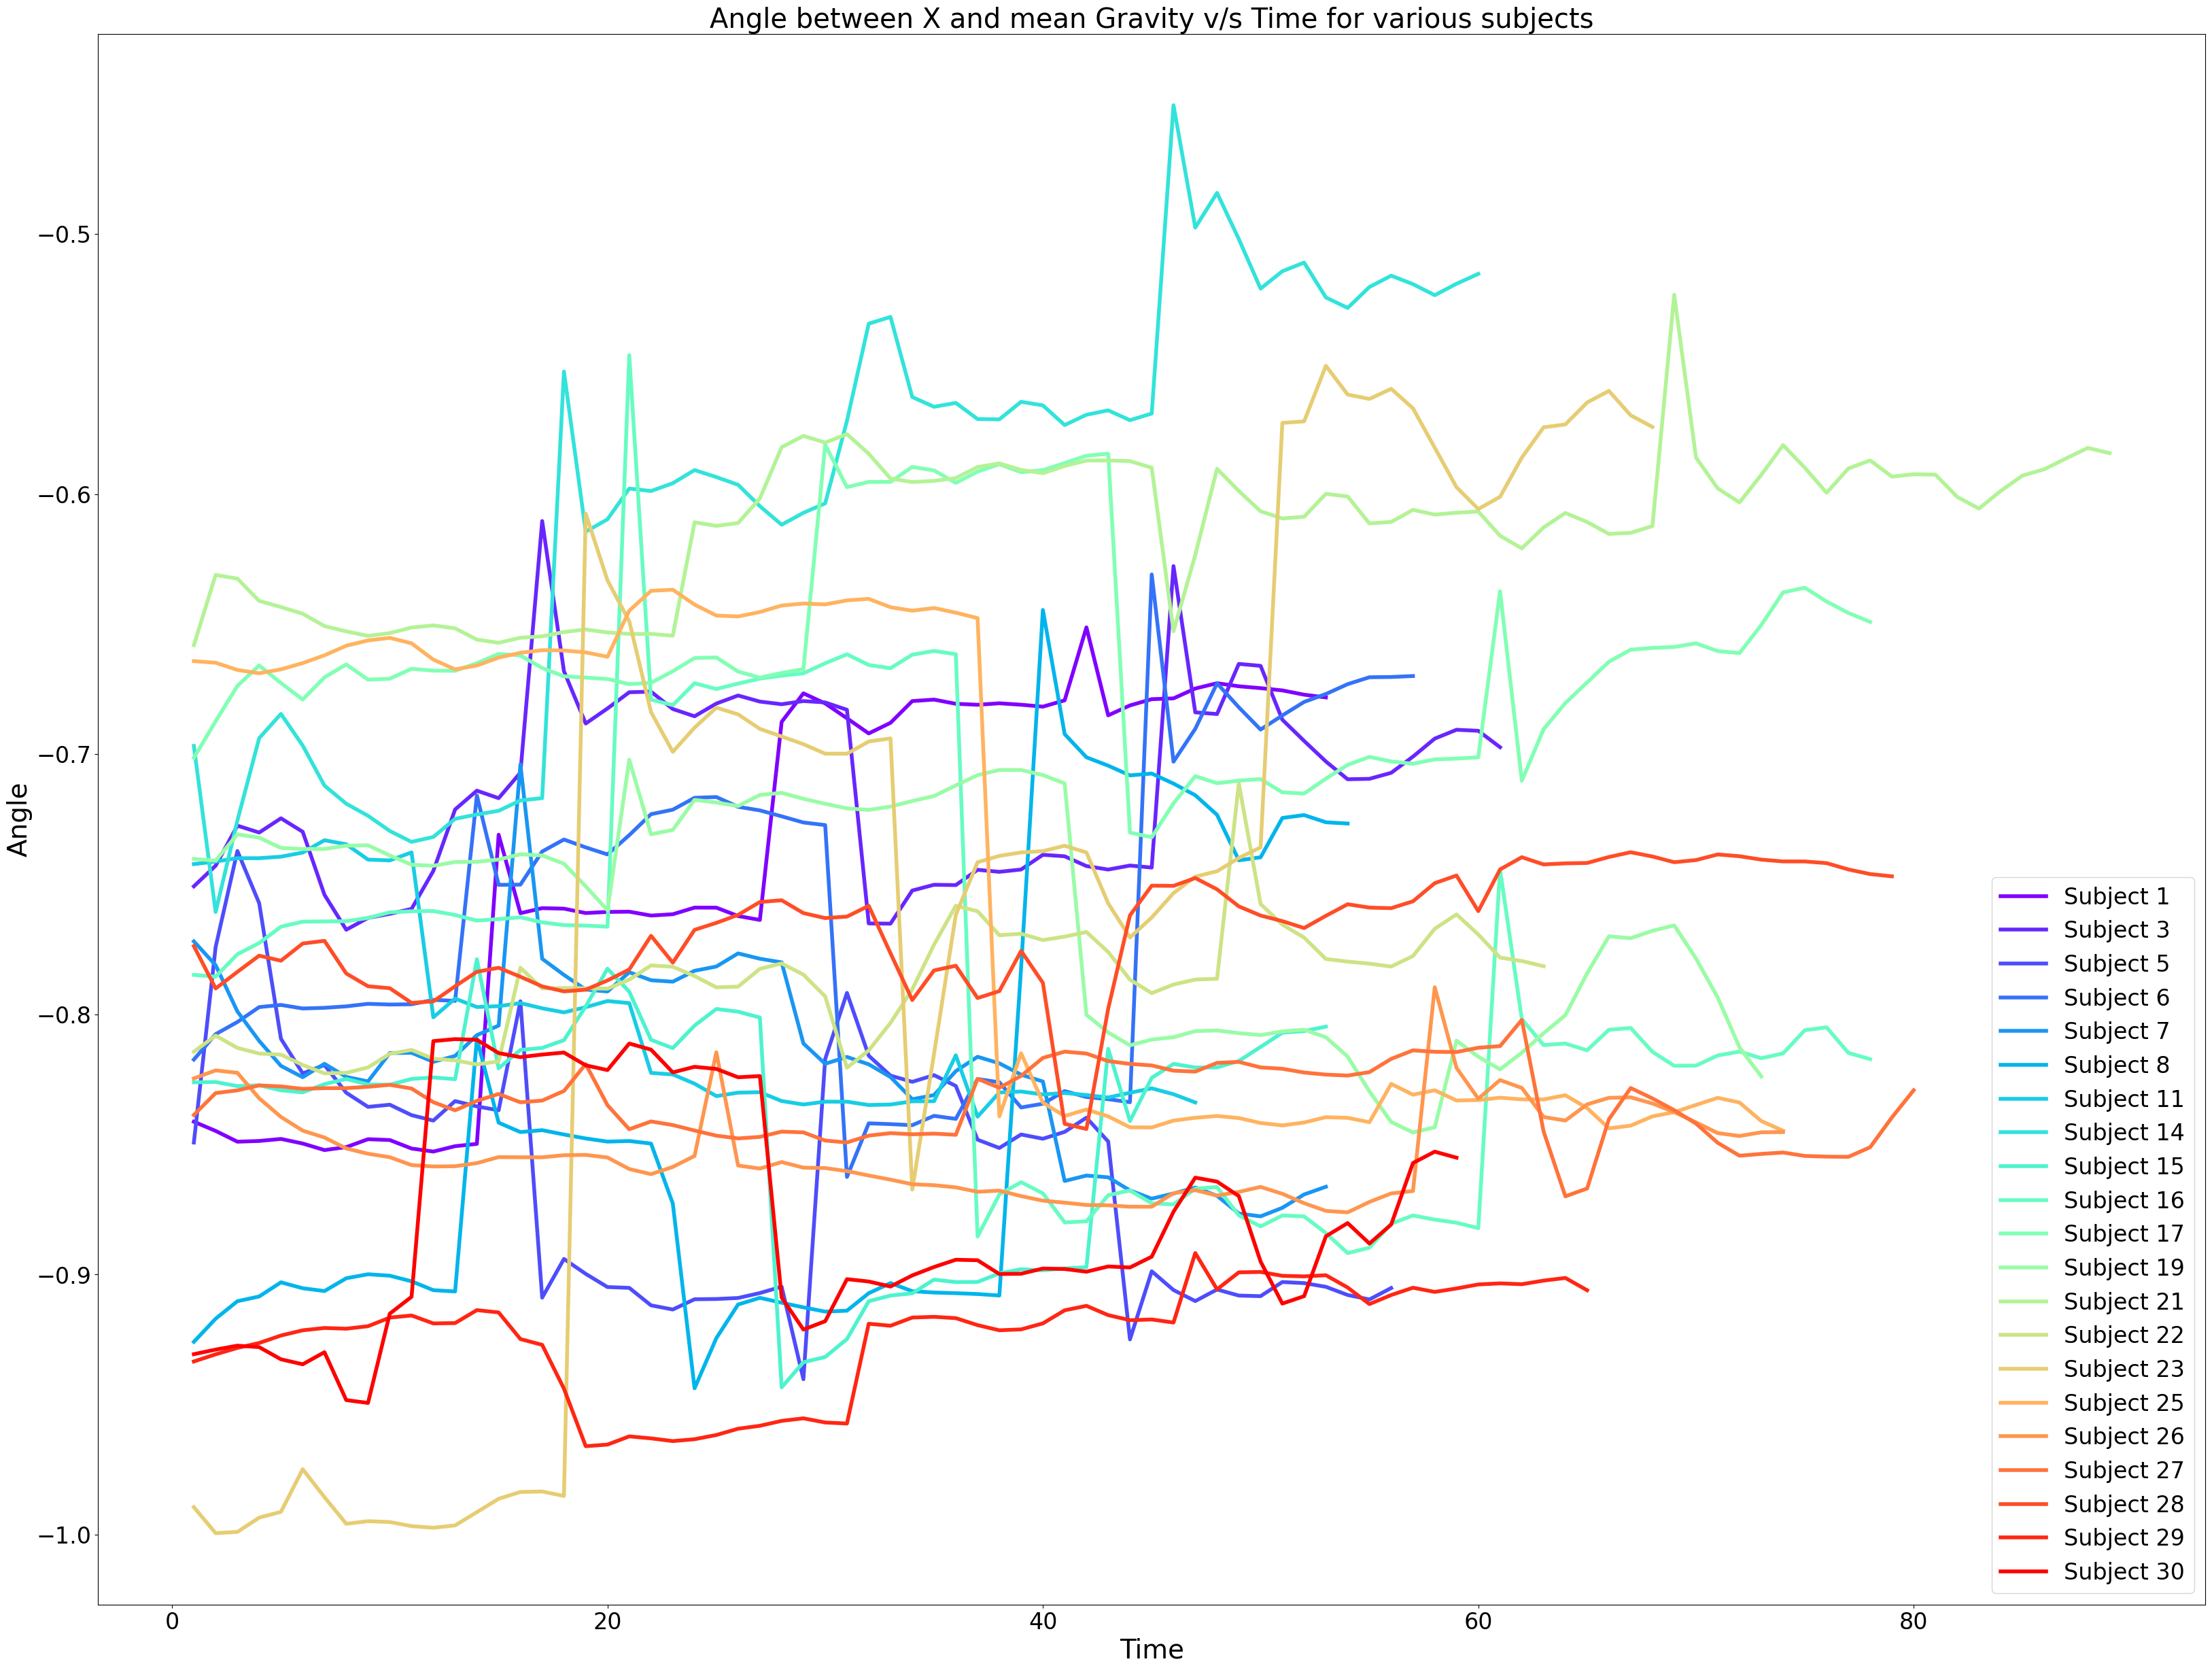

In [9]:
for row_number in range(standing_activity.shape[0]):
    if (row_number == 0
        or standing_activity.iloc[row_number]['subject'] == standing_activity.iloc[row_number - 1]['subject']):
        time_series[index] = time
        time += 1
    else:
        time_series[index] = 1
        time = 2
    index += 1
# Combine the time_series with standing_activity dataframe
time_series_df = pd.DataFrame({'Time': time_series})
standing_activity_df = pd.concat([standing_activity, time_series_df], axis=1)

colors = cm.rainbow(np.linspace(0, 1, len(standing_activity_df['subject'].unique())))

# Create plot for each subject, which will all be displayed overlapping on one plot
id = 0
for subject in standing_activity_df['subject'].unique():
    plt.rcParams.update({'figure.figsize': [40, 30], 'font.size': 24})
    plt.plot(standing_activity_df[standing_activity_df['subject'] == subject]['Time'],
             standing_activity_df[standing_activity_df['subject'] == subject]['angle(X,gravityMean)'],
             c = colors[id],
             label = 'Subject ' + str(subject),
             linewidth = 4)
    plt.xlabel('Time',fontsize=28)
    plt.ylabel('Angle',fontsize=28)
    plt.title('Angle between X and mean Gravity v/s Time for various subjects')
    plt.legend(prop = {'size': 24})
    id += 1

If I take a closer look at the graph, we can see that each row on average transit between a maximum range of 0.2 to 0.3 values. This is indeed the expected behaviour as slight variations can be attributed to minor human errors.

### Human Activity Recognition Model with Python:

Now I will train machine learning models for the task of recognizing human activity. Here I will be using various machine learning algorithms available in the Scikit-Learn library in Python that I have already imported. For each algorithm, I’ll calculate the accuracy of the prediction and identify the most accurate algorithm:

Support Vector Classifier accuracy: 95.04580929759076%


/home/ali/miniconda3/envs/ali-gpu/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 95.79233118425518%
K Nearest Neighbors Classifier accuracy: 90.02375296912113%
Random Forest Classifier accuracy: 93.28130302002036%


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

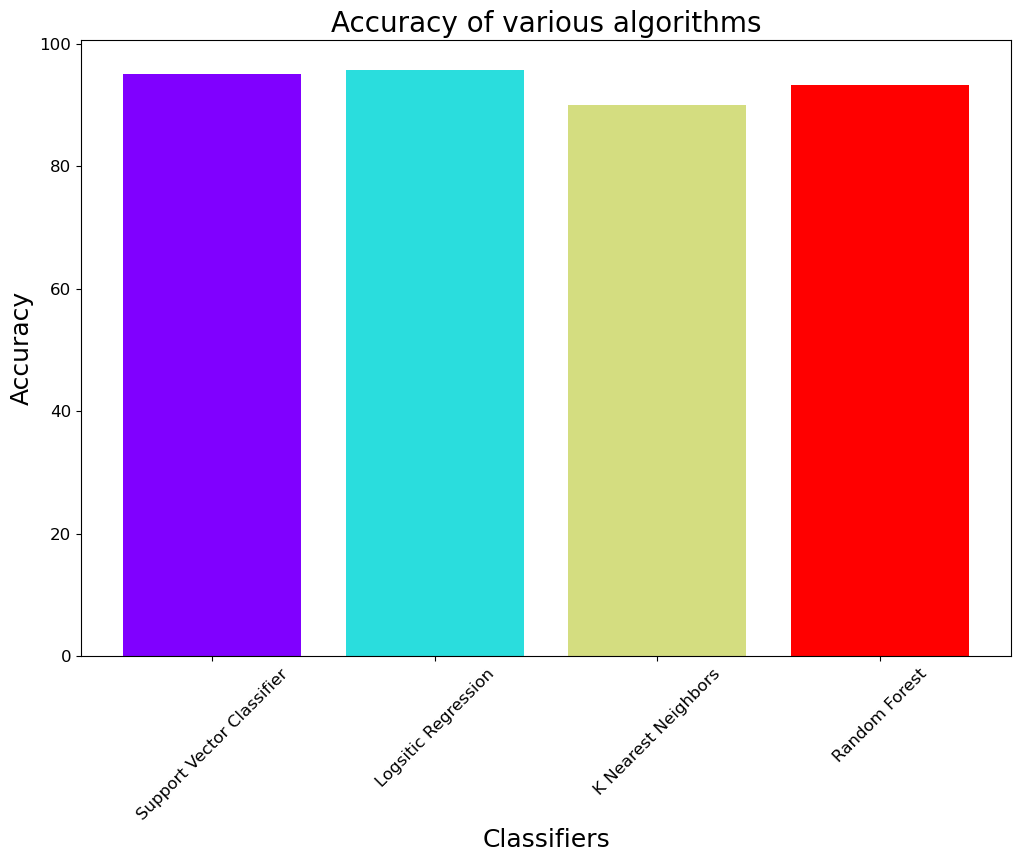

In [11]:
accuracy_scores = np.zeros(4)

# Support Vector Classifier
clf = SVC().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

# Logistic Regression
clf = LogisticRegression().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

# Random Forest
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

plt.figure(figsize=(12,8))
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['Support Vector Classifier', 'Logsitic Regression', 'K Nearest Neighbors', 'Random Forest']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Accuracy of various algorithms',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

So we can clearly see that the Logistic Regression model performs the best for the task of Human Activity Recognition with Machine Learning.

Source:

https://thecleverprogrammer.com/2021/01/10/human-activity-recognition-with-machine-learning/